In [1]:
import pybel
import pandas as pd
#import imolecule
from IPython.display import display, HTML
from IPython.core.display import display_svg, SVG
#import matplotlib
#%matplotlib inline
outpath = "/Users/spencertrinh/GitRepos/JupyterNotebook/Juypter-Notebook_mac/"

In [2]:
f = "/Users/spencertrinh/GitRepos/JupyterNotebook/Juypter-Notebook_mac/purecmpdsummary.csv"
df = pd.read_csv(f)

In [6]:
df

,P number,Extract NSC,Batch number,Structure SMILES,Trivial name,Record Number,Unnamed: 6
0,P21151,F250369,F250369_4503_25_39,O=C1[C@H](C)NC(/C(N1)=C\C2=CC=C(OC/C=C(C)/CC/C...,Mycelianamide,5,"insert into NPSG_COMPOUNDS values ('P', 21151,..."
1,P20916,F250369,F250369_4503_23_14,OC1C2=CC(OC2=CCO1)=O,Patulin,6,"insert into NPSG_COMPOUNDS values ('P', 20916,..."
2,P21413,N15197,N15197_4503_33_34,O=C1O[C@@]2(C[C@@](C)(OC(C)=O)CO2)[C@H](O)[C@@...,Dichapetalin P,7,"insert into NPSG_COMPOUNDS values ('P', 21413,..."
3,P20545,N15187,N15197_4503_19_66,O=C1C2=C(C3=CC=C(OCO4)C4=C3)C5=CC(OC)=C(OC)C=C...,Phyllanthusmin D,8,"insert into NPSG_COMPOUNDS values ('P', 20545,..."
4,P25376,C2201,M2201_2,O=C1C2=NC=CC3=C2C(C=C1OC)=CC=N3,aaptamine,9,"insert into NPSG_COMPOUNDS values ('P', 25376,..."
5,P25377,C2201,C2201_5_4508_34_23,COC1=C(NC=C2)C(C2=[NH+]C=C3)=C3C=C1OC,demetyly(oxy)aaptamine,10,"insert into NPSG_COMPOUNDS values ('P', 25377,..."
6,P19315,N500561,N500561_4501_62_25,O=C1O[C@]([C@]2(CO3)[C@]4([H])[C@@H](O)[C@H](O...,bruceine D,11,NaN
7,P20952,N500561,N500561_4501_62_73,O=C1C(O)=C(C)[C@@](C[C@](O2)([H])[C@]34[C@]5([...,bruceine A,12,NaN
8,P20951,N500561,N500561_4501_62_64,O=C1C(O)=C(C)[C@@](C[C@](O2)([H])[C@]34[C@]5([...,brusatol,13,NaN
9,P20953,N500561,N500561_4501_62_76,O=C1C(O)=C(C)[C@@](C[C@](O2)([H])[C@]34[C@]5([...,bruceatinol,14,NaN


In [20]:
df['Structure SMILES'][df['P number'] == 'P19037'].values

array(['[R]C1=C[N+](CC2=CC=C[N+](CC3=C[N+](CC4=CC=C[N+]([R])=C4)=CC=C3)=C2)=CC=C1'],
      dtype=object)

In [3]:
mols ={}
for i,j in zip(df['P number'],df['Structure SMILES']):
    if j:
        try:
            mols[i] = pybel.readstring('smi',j)
        except Exception as e:
            print(e)
            pass

in method 'OBConversion_ReadString', argument 3 of type 'std::string'
in method 'OBConversion_ReadString', argument 3 of type 'std::string'
in method 'OBConversion_ReadString', argument 3 of type 'std::string'
in method 'OBConversion_ReadString', argument 3 of type 'std::string'
in method 'OBConversion_ReadString', argument 3 of type 'std::string'


In [ ]:
mols = {name:pybel.readstring("smi",strings) for name,strings if strings}
#won't work bc 4 have errors in smi string


In [20]:
descvalues=[]
for mol in mols:
    descvalues.append(mol.calcdesc())
print([k for k in descvalues[0]])

['cansmi', 'cansmiNS', 'formula', 'HBA1', 'HBA2', 'HBD', 'InChI', 'InChIKey', 'logP', 'MR', 'MW', 'nF', 's', 'smarts', 'title', 'TPSA']


In [27]:
fps = [x.calcfp() for x in mols]

In [29]:
fps[0]|fps[1] #tanimoto coefficient (similarity)

0.27710843373493976

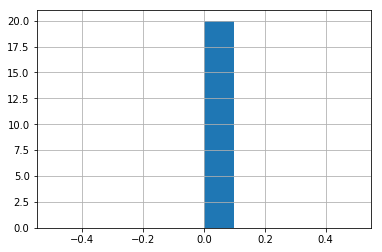

In [21]:
dfdv = pd.DataFrame(descvalues)
dfdv["logP"].hist()

In [23]:
dfdv

,HBA1,HBA2,HBD,InChI,InChIKey,MR,MW,TPSA,cansmi,cansmiNS,formula,logP,nF,s,smarts,title
0,3.0,3.0,1.0,NaN,NaN,0.0,386.56742,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
1,5.0,5.0,3.0,NaN,NaN,0.0,462.66184,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
2,6.0,4.0,1.0,NaN,NaN,0.0,348.47638,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
3,2.0,2.0,0.0,NaN,NaN,0.0,202.24906,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
4,5.0,5.0,1.0,NaN,NaN,0.0,316.35654,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
5,3.0,3.0,1.0,NaN,NaN,0.0,386.56742,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
6,2.0,2.0,1.0,NaN,NaN,0.0,501.79084,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
7,2.0,2.0,1.0,NaN,NaN,0.0,580.68690,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
8,11.0,11.0,1.0,NaN,NaN,0.0,554.97074,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
9,3.0,4.0,1.0,NaN,NaN,0.0,422.62930,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN


In [33]:
shaders = tuple(len(mols)*["lambert"])
renders = (imolecule.draw(c, size = (50,50),shader=s, dispaly_html=False) for c,s in zip(tuple(mols),shaders))
columns = ('<div class="col-xs-6 col-sm-3">{}</div>'.format(r) for r in renders)

In [ ]:
display(HTML('<div class="row">{}</div>'.format("".join(columns))))

In [18]:
mols['P20916'].title = 'P20916'

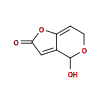

In [19]:
mols['P20916']

In [20]:
mols['P20916'].title

'P20916'

In [21]:
mols['P20916'].write('svg',outpath+'P20916.svg',opt={'u':None,'C':None,'P':250},overwrite=True)

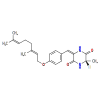

In [8]:
mols['P21151']

In [2]:
smi = 'CC1=C2[C@H](C(=O)[C@@]3([C@H](C[C@@H]4[C@]([C@H]3[C@@H]([C@@](C2(C)C)(C[C@@H]1OC(=O)[C@@H]([C@H](c5ccccc5)NC(=O)c6ccccc6)O)O)OC(=O)c7ccccc7)(CO4)OC(=O)C)O)C)OC(=O)C'
m = pybel.readstring('smi',smi)
s = m.write('svg',opt={'C':None,'P':500})

In [5]:
ss= s.replace('\n','')

In [4]:
from bs4 import BeautifulSoup as bs
xmlfile = '/Users/spencertrinh/GitRepos/JupyterNotebook/Juypter-Notebook_mac/test.svg'

## Need to change: 1) g transform x value, 2) xmlcml width of main svg 3) viewbox x-value of main svg 4) delete headers for remainder 5) title x-value

In [33]:
#G XAXIS# transform(0,0)
def adjGaxis(g,adjustNum):
    oldg_x = g['transform']
    oldg_x_lst = re.split('(\(.)',oldg_x)
    newg_x = str(int(re.search('\d',oldg_x_lst[1]).group(0)) + adjustNum)
    g['transform'] = newg_x
    return g['transform']

#TITLE X#
def adjTitaxis(g,adjustNum):
    oldtitle_x = g.next_sibling.next_sibling['x'] 
    newtitle_x = str(float(oldtitle_x) + adjustNum)
    g.next_sibling.next_sibling['x'] = newtitle_x
    return g.next_sibling.next_sibling['x']

#VIEWBOX#
def adjviewbx(soup,adjNum):
    oldview_x = soup.svg.next_sibling.next_sibling.next_sibling.next_sibling['viewbox']
    oldview_x_lst = oldview_x.split()
    newview_x = str(int(oldview_x_lst[2])+ adjNum)
    oldview_x_lst[2] = newview_x
    newview_x_lst = ' '.join(oldview_x_lst)
    soup.svg.next_sibling.next_sibling.next_sibling.next_sibling['viewbox']=newview_x_lst
    return soup.svg.next_sibling.next_sibling.next_sibling.next_sibling['viewbox']

#WIDTH#
def adjxmlnswidth(soup,adjNum):
    oldwidth_x = soup.svg.next_sibling.next_sibling.next_sibling.next_sibling['width']
    newwidth_x = re.search('\d+',oldwidth_x).group(0)
    newwidth_xj = str(int(newwidth_x)+adjNum)
    soup.svg.next_sibling.next_sibling.next_sibling.next_sibling['width'] = newwidth_x
    return soup.svg.next_sibling.next_sibling.next_sibling.next_sibling['width']

def rmxmldecl():
    return ''

def xmldeclar(arg):
    result = switcher.get(arg)
    if result == None: #if line is not in dictionary then return the original line; otherwise it will be a blank
        result = arg
    return result

In [101]:
#adjust width alternative method:
lstnums = [int(s) for s in list(t) if s.isdigit()]
''.join([str(i) for i in lstnums])

'200'

In [73]:
switcher = {
        content[0]:rmxmldecl(),
        content[1]:rmxmldecl(),
        content[2]:rmxmldecl(),
        content[3]:rmxmldecl()
    }

rmlst = ['<title>','<rect>','</svg>']
xmlWOdecl = [] #to remove xml declarations
indexsvg={} #to find the line number of the </svg> tags
offset = 7 #to subtract from countsvg for proper counting of the svg tags

with open(xmlfile) as f:
    sp = bs(f) #make beautifulsoup object (for searching and changing x-values)

countsvg = len(soup.findAll('svg'))
    
adjviewbx(sp,countsvg*100) #adjust main view box
adjxmlnswidth(sp,countsvg*100) #adjust x width of main xml node

gaxis_increase=10
titaxis_increase=100
for i,g in enumerate(sp.find_all('g')): #iterate thru and increase g axis & title axis
    adjGaxis(g,gaxis_increase*i)
    adjTitaxis(g,titaxis_increase*i)

sp_tmp = re.sub('(/>$)','/>\n',str(sp)) #rather than reading from file, use the bs4 object convert to string
sp_tmp = re.split('(\n)',sp_tmp)

for i in range(len(sp_tmp)): #remove title, remainding rect and svg tags
    if i >10 and sp_tmp[i].startswith(rmlst[0]) or sp_tmp[i].startswith(rmlst[1]):
        sp_tmp[i] = ''
    elif sp_tmp[i].startswith(rmlst[2]):
        indexsvg[str(countsvg-offset)] = i #the line # 
    checklines = xmldeclar(sp_tmp[i])
    if checklines:
        xmlWOdecl.append(checklines)
    offset-=1
        
for i in range(0,countsvg,2): #remove every other </svg> tag
    if i<1:
        pass
    else:
        sp_tmp[indexsvg[str(i)]] = ''  

#content = [x.strip() for x in content]     
combxml = [' '.join(sp_tmp[0:4])] + xmlWOdecl

with open('/Users/spencertrinh/Desktop/xmltest.svg','w') as f:
    for i in combxml:
        f.write(i+'\n')

KeyError: '2'

In [21]:
output = pybel.Outputfile('svg',outpath+'test.svg',overwrite=True)
for i in ['P21151', 'P20916', 'P21413', 'P20545']:
    m=mols[i]
    m.title = i
    output.write(m)
output.close()

In [135]:
import xml.etree.ElementTree as ET 
#import re
#xmlfile = '/Users/spencertrinh/GitRepos/JupyterNotebook/Juypter-Notebook_mac/grid.svg'

In [ ]:
ET.parse('/Users/spencertrinh/Desktop/xmltest.svg')

In [11]:
tree = ET.fromstring(ss)
print(tree.tag)

{http://www.w3.org/2000/svg}svg


In [13]:
for child in tree:
    print(child.tag,child.attrib)

{http://www.w3.org/2000/svg}title {}
{http://www.w3.org/2000/svg}rect {'x': '0', 'y': '0', 'width': '100', 'height': '100', 'fill': 'white'}
{http://www.w3.org/2000/svg}g {'transform': 'translate(0,0)'}
{http://www.w3.org/2000/svg}text {'font-size': '18.000000', 'fill': 'black', 'font-family': 'sans-serif', 'x': '10.000000', 'y': '20.000000'}


In [20]:
#adjust x-axis for the title (name of compound)
#old = tree[3].attrib['x'] #'10.000000'
new = int(tree[3].attrib['x']) + 100

'10.000000'

In [28]:
dir(tree)

['__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'attrib',
 'clear',
 'extend',
 'find',
 'findall',
 'findtext',
 'get',
 'getchildren',
 'getiterator',
 'insert',
 'items',
 'iter',
 'iterfind',
 'itertext',
 'keys',
 'makeelement',
 'remove',
 'set',
 'tag',
 'tail',
 'text']

In [10]:
dir(mols['P20916'])

['OBMol',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cinfony',
 '_exchange',
 '_gettitle',
 '_repr_html_',
 '_repr_svg_',
 '_settitle',
 'addh',
 'atoms',
 'calccharges',
 'calcdesc',
 'calcfp',
 'charge',
 'clone',
 'conformers',
 'convertdbonds',
 'data',
 'dim',
 'draw',
 'energy',
 'exactmass',
 'formula',
 'localopt',
 'make3D',
 'molwt',
 'removeh',
 'residues',
 'spin',
 'sssr',
 'title',
 'unitcell',
 'write']

In [39]:
#molimgs = []
outpath = "/Users/spencertrinh/GitRepos/JupyterNotebook/Juypter-Notebook_mac/"
highlighter = pybel._operations["highlight"]
smarts = pybel.Smarts("C(=O)")
for name,mol in mols.items():
    mol.removeh()
    if smarts.findall(mol):
        mol.title = name
        highlighter.Do(mol.OBMol, "C(=O) red")
        #molimgs.append(SVG(mol.write("svg",opt={"u":None,"C":None,"P":250,"r":4})))
        mol.write("svg",filename=outpath+name+'.svg',opt={"u":None,"C":None,"P":250,"r":4})
#display_svg(*molimgs)

In [36]:
import os
os.getcwd()

'/Users/spencertrinh/GitRepos/JupyterNotebook/Juypter-Notebook_mac'

In [10]:
from indigo.indigo import *
from indigo.indigo_renderer import *
 
indigo = Indigo()
renderer = IndigoRenderer(indigo)

query = indigo.loadQueryMolecule("[CX3]=[OX1]")
nameLst = []
for name,mol in zip(df['Name'],df['SMILES']):
    tgt=indigo.loadMolecule(mol)
    match = indigo.substructureMatcher(tgt).match(query)

    if match:
        nameLst.append(name)
        matching = match.highlightedTarget()
        matching.foldHydrogens() # Indigo does not change the representation of the hydrogens automatically
        matching.layout() # if not called, will be done automatically by the renderer

        indigo.setOption("render-output-format", "png")
        indigo.setOption("render-image-size", 200, 250)
        indigo.setOption("render-relative-thickness",1.35)
        indigo.setOption("render-label-mode","hetero")
        indigo.setOption("render-background-color", 1.0, 1.0, 1.0)
        indigo.setOption("render-stereo-style","none")
        indigo.setOption("render-margins",2,2)

        renderer.renderToFile(matching, "{}{}.png".format(outpath,name))

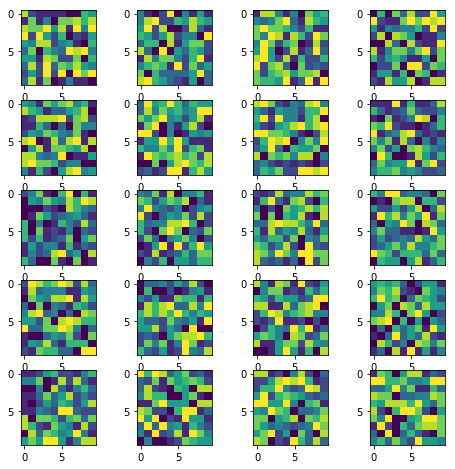

In [6]:
import numpy as np
import matplotlib.pyplot as plt

w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)

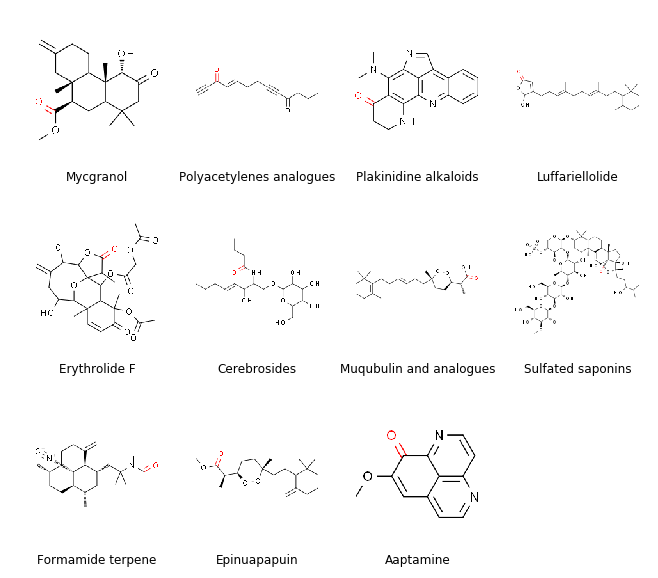

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

outpath = "C:/users/trinh/documents/Python Jupyter/pybel_dplyChemStruc/"
fig=plt.figure(figsize=(11, 10))
columns = 4
rows = 3

for i in range(1,columns*rows+1):
    if i == 12:
        break
    pil_im = Image.open(outpath+nameLst[i]+'.png', 'r')
    ax = fig.add_subplot(rows, columns, i)
    plt.axis('off')
    f = plt.gcf()
    ax.set_title(nameLst[i], y=-0.1) # increase or decrease y as needed
    plt.imshow(pil_im)
fig.savefig(outpath+'chemstrucs.png',bbox_inches='tight',dpi=450)